### Stock Market Prediction And Forecasting Using Stacked LSTM

In [2]:
### Keras and Tensorflow >2.0

In [4]:
### Data Collection
import pandas_datareader as pdr
key="dcbdde936e7866b9ae45c380c36a2f04c62bcc90"

In [5]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\saini\AppData\Local\Temp\ipykernel_34108\1593133401.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [6]:
df.to_csv('AAPL.csv')

In [7]:
import pandas as pd

In [8]:
df=pd.read_csv('AAPL.csv')

In [9]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-07-26 00:00:00+00:00,207.74,209.73,207.14,207.48,17618874,50.122989,50.603131,49.978222,50.060256,70475496,0.0,1.0
1,AAPL,2019-07-29 00:00:00+00:00,209.68,210.64,208.44,208.46,21673389,50.591067,50.822693,50.291883,50.296708,86693556,0.0,1.0
2,AAPL,2019-07-30 00:00:00+00:00,208.78,210.16,207.31,208.76,33935718,50.373917,50.706880,50.019239,50.369092,135742872,0.0,1.0
3,AAPL,2019-07-31 00:00:00+00:00,213.04,221.37,211.30,216.42,69281361,51.401759,53.411601,50.981936,52.217277,277125444,0.0,1.0
4,AAPL,2019-08-01 00:00:00+00:00,208.43,218.03,206.74,213.90,54017922,50.289470,52.605734,49.881711,51.609258,216071688,0.0,1.0


In [10]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2024-07-17 00:00:00+00:00,228.88,231.4599,226.640,229.450,57345884,228.88,231.4599,226.640,229.450,57345884,0.0,1.0
1252,AAPL,2024-07-18 00:00:00+00:00,224.18,230.4400,222.270,230.280,66034585,224.18,230.4400,222.270,230.280,66034585,0.0,1.0
1253,AAPL,2024-07-19 00:00:00+00:00,224.31,226.8000,223.275,224.820,49151453,224.31,226.8000,223.275,224.820,49151453,0.0,1.0
1254,AAPL,2024-07-22 00:00:00+00:00,223.96,227.7800,223.090,227.010,48201835,223.96,227.7800,223.090,227.010,48201835,0.0,1.0
1255,AAPL,2024-07-23 00:00:00+00:00,225.01,226.9400,222.680,224.365,39960260,225.01,226.9400,222.680,224.365,39960260,0.0,1.0


In [11]:
df1=df.reset_index()['close']

In [12]:
df1

0       207.74
1       209.68
2       208.78
3       213.04
4       208.43
         ...  
1251    228.88
1252    224.18
1253    224.31
1254    223.96
1255    225.01
Name: close, Length: 1256, dtype: float64

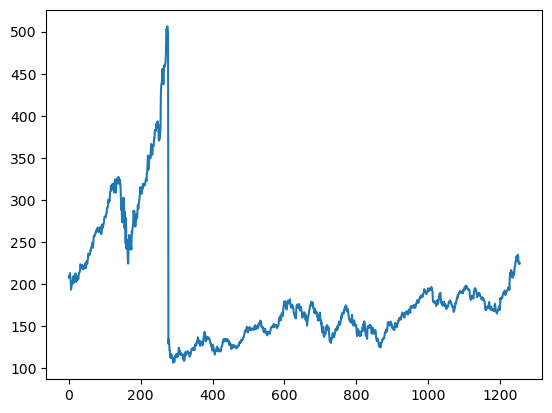

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [14]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [15]:
import numpy as np

In [16]:
df1

0       207.74
1       209.68
2       208.78
3       213.04
4       208.43
         ...  
1251    228.88
1252    224.18
1253    224.31
1254    223.96
1255    225.01
Name: close, Length: 1256, dtype: float64

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
print(df1)

[[0.25272386]
 [0.25758297]
 [0.25532874]
 ...
 [0.29422668]
 [0.29335003]
 [0.29597996]]


In [19]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [20]:
training_size,test_size

(816, 440)

In [21]:
train_data

array([[2.52723857e-01],
       [2.57582968e-01],
       [2.55328741e-01],
       [2.65998748e-01],
       [2.54452098e-01],
       [2.43406387e-01],
       [2.16656230e-01],
       [2.25823419e-01],
       [2.30932999e-01],
       [2.41928616e-01],
       [2.35817157e-01],
       [2.34539762e-01],
       [2.55804634e-01],
       [2.40225423e-01],
       [2.37695679e-01],
       [2.49618034e-01],
       [2.59261115e-01],
       [2.59286162e-01],
       [2.64996869e-01],
       [2.64546024e-01],
       [2.39949906e-01],
       [2.49592987e-01],
       [2.43757044e-01],
       [2.47188478e-01],
       [2.55904822e-01],
       [2.55228554e-01],
       [2.47614277e-01],
       [2.56355667e-01],
       [2.66599875e-01],
       [2.66549781e-01],
       [2.68829054e-01],
       [2.75165936e-01],
       [2.92423294e-01],
       [2.91170946e-01],
       [2.80300564e-01],
       [2.83180964e-01],
       [2.85184721e-01],
       [2.90369443e-01],
       [2.85835942e-01],
       [2.77745773e-01],


In [22]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [23]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [24]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [25]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [26]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [29]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


c:\Users\saini\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - loss: 0.0794 - val_loss: 0.0012
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0156 - val_loss: 6.7928e-04
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0098 - val_loss: 0.0013
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0100 - val_loss: 3.2127e-04
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0083 - val_loss: 8.0082e-04
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0096 - val_loss: 7.0123e-04
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0053 - val_loss: 4.0756e-04
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0056 - val_loss: 3.2964e-04
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0082 - val_loss: 9.7695e-04
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0052 - val_loss: 7.3892e-04
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0057 - val_loss: 0.0014
Epoch 12/100
12/12

In [34]:
import tensorflow as tf

In [35]:
tf.__version__

'2.17.0'

In [36]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [37]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [38]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

205.8504530780466

In [39]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

178.76509970137803

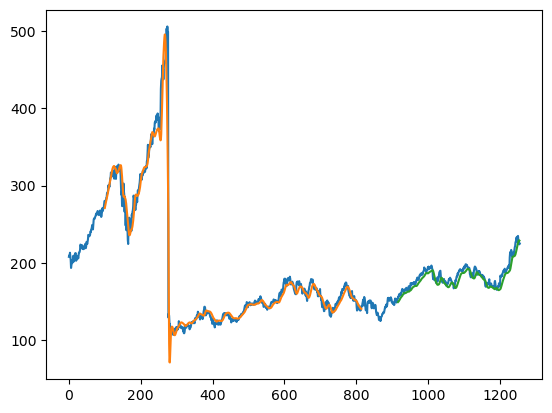

In [40]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [41]:
len(test_data)

440

In [42]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 99)

In [43]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [44]:
temp_input

[0.18239198497182213,
 0.17097056981840947,
 0.1584971822166562,
 0.15599248591108322,
 0.15569192235441448,
 0.16002504696305564,
 0.16508453350031305,
 0.16628678772698802,
 0.16102692548528486,
 0.1657107075767063,
 0.16475892298058858,
 0.16751408891671882,
 0.173425172197871,
 0.17991233562930486,
 0.1616280525986224,
 0.16390732623669374,
 0.16032561051972444,
 0.15747025673137127,
 0.16648716343143388,
 0.16190356919223536,
 0.15827175954915462,
 0.1552911709455228,
 0.1573199749530369,
 0.1552410770194113,
 0.1571446462116468,
 0.1543143393863493,
 0.15737006887914834,
 0.1526361928616155,
 0.1708202880400751,
 0.17460237946149026,
 0.16493425172197868,
 0.1566437069505322,
 0.15318722604884155,
 0.1507827175954915,
 0.1456731371321227,
 0.14777708202880396,
 0.15043206011271132,
 0.15574201628052597,
 0.15792110206637439,
 0.1564433312460864,
 0.16696305572949277,
 0.15902316844082653,
 0.1564433312460864,
 0.16578584846587346,
 0.19170945522855348,
 0.1875266123982467,
 0.189

In [52]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.15664371 0.15318723 0.15078272 0.14567314 0.14777708 0.15043206
 0.15574202 0.1579211  0.15644333 0.16696306 0.15902317 0.15644333
 0.16578585 0.19170946 0.18752661 0.18925485 0.19010645 0.19469004
 0.19088291 0.19897307 0.20185348 0.20758923 0.20788979 0.20796493
 0.21089543 0.21417658 0.21054477 0.20047589 0.20824045 0.2082655
 0.20901691 0.2115216  0.21392611 0.21838447 0.21918597 0.22299311
 0.21951158 0.2255479  0.2161052  0.25124609 0.26607389 0.26900438
 0.26462116 0.2750908  0.26912962 0.25758297 0.25209768 0.25372574
 0.2560551  0.26652473 0.26865373 0.25993738 0.27529117 0.2841077
 0.28731371 0.29931121 0.30301816 0.3051722  0.31594239 0.30239198
 0.30983093 0.31949906 0.32055103 0.30567314 0.29390106 0.29422668
 0.29335003 0.29597996 0.30018255 0.30018255 0.29560706 0.29369926
 0.29178873 0.28980455 0.287723   0.28554416 0.28327778 0.28093663
 0.27853268 0.27607659 0.27357715 0.2710416  0.26847577 0.26588443
 0.26327136 0.26063943 0.25799119 0.25532842 0.25265

In [53]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [54]:
import matplotlib.pyplot as plt

In [55]:
len(df1)

1256

ValueError: x and y must have same first dimension, but have shapes (100,) and (98, 1)

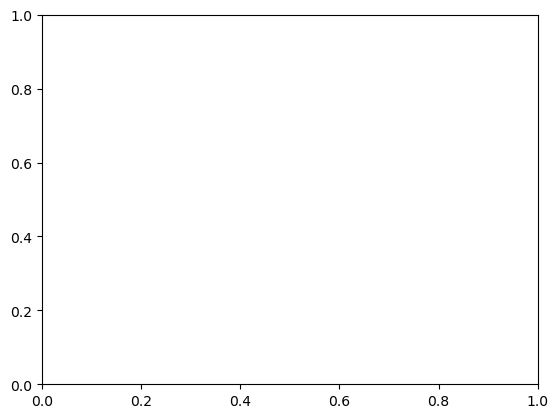

In [57]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

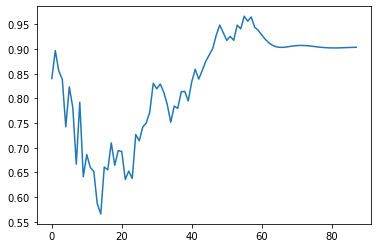

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

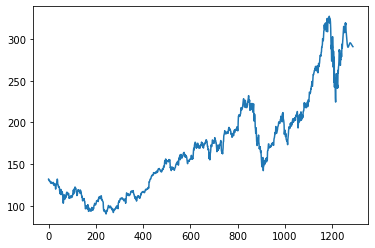

In [ ]:
plt.plot(df3)